In [425]:
import pandas as pd
df = pd.read_csv('combined_news_dataset.csv')


Veiem que, en fer el scraping, la data de publicació de les diferents notícies (present a la columna *published*) està expressada en zones horàries diferents i amb un format diferent. Algunes dates estan expressades en UTC (Coordinated Universal Time), mentre que d'altres utilitzen altres zones horàries locals, com l'horari d'Europa o d'Amèrica, que tenen desplaçaments respecte a UTC.

Per solucionar aquesta diversitat de formats i zones horàries, transformem totes les dades a UTC(per ser universal) i en format ISO 8601 (`AAAA-MM-DDTHH:mm:ss+00:00`).

In [426]:
from dateutil import parser
import numpy as np

def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return None  # Retorna None si la data no es pot convertir

df['published'] = df['published'].apply(lambda x: parse_date(x) if pd.notnull(x) else x)

num_nat = df['published'].isna().sum()
print(f"Nombre de dates no convertides: {num_nat}")

# Converteix la columna 'published' a un tipus de pandas amb suport de zona horària
df['published'] = pd.to_datetime(df['published'], utc=True, errors='coerce')

dates_no_convertides = df[df['published'].isna()]['published']
print("Dates que no s'han pogut convertir:")
print(dates_no_convertides)

print(df['published'].head())
print(df['published'].tail())

Nombre de dates no convertides: 2
Dates que no s'han pogut convertir:
848    NaT
1838   NaT
Name: published, dtype: datetime64[ns, UTC]
0          2016-10-26 18:41:00+00:00
1   2016-10-29 05:47:11.259000+00:00
2   2016-10-30 23:41:49.479000+00:00
3          2016-11-01 03:22:00+00:00
4          2016-11-01 19:56:00+00:00
Name: published, dtype: datetime64[ns, UTC]
2591   2024-11-14 22:00:12+00:00
2592   2024-11-14 22:00:00+00:00
2593   2024-11-14 21:59:09+00:00
2594   2024-11-14 21:58:38+00:00
2595   2024-11-14 21:54:18+00:00
Name: published, dtype: datetime64[ns, UTC]


També observem que hi ha autors que no són Nans pero que tenen assignat 'No Author' o '-NO AUTHOR-'. Per poder tractar les dades adequadament, assignarem aquests valors com Nans. El mateix amb les notícies sense imatge assignades com 'No Image URL' i amb el títol 'no title', i pel títol i el text [Removed].

In [427]:
df_no_conv = pd.read_csv('combined_news_dataset.csv')
dates_no_convertides_originals = df_no_conv.loc[[848, 1838], 'published']
print("Dates originals que no s'han pogut convertir:")
print(dates_no_convertides_originals)
#les dates que no s'han pogut convertir és perquè són links

Dates originals que no s'han pogut convertir:
848     http://davidduke.com/wp-content/uploads/2014/0...
1838    http://theeconomiccollapseblog.com/wp-content/...
Name: published, dtype: object


In [428]:

df = df.dropna(subset=['published'])

In [429]:
#df['author'] = df['author'].replace(['No Author', '-NO AUTHOR-'], np.nan)
df['main_img_url'] = df['main_img_url'].replace(['No Image URL'], np.nan)
df['title'] = df['title'].replace(['no title', '[Removed]'], np.nan)
df['text'] = df['text'].replace(['[Removed]'], np.nan)
df['text_without_stopwords'] = df['text_without_stopwords'].replace(['[ Removed ]'], np.nan)

In [430]:
df.describe(include='all')

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
count,2529,2594,2389,2529,2593,2593,2085,2593,2593,2592,2525,2593.000000
unique,805,NaN,2200,2353,5,499,1606,9,2,2198,2349,NaN
top,No Author,NaN,newsticker,“There are a lot of blogs and news sites claim...,english,prisonplanet.com,http://conservativeangle.com/wp-content/upload...,bs,Real,title,“ lot blogs news sites claiming understand pol...,NaN
freq,505,NaN,11,9,2516,100,58,600,1300,187,9,NaN
mean,NaN,2018-05-22 07:08:40.243757056+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803702
min,NaN,2016-10-26 00:51:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2016-10-27 21:03:15+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2016-11-01 22:13:02.201499904+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2016-11-18 18:10:28.578500096+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,NaN,2024-11-14 23:59:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [431]:
#Mirem si hi ha nans (%)
nan_columns = df.columns[df.isna().sum()>0].tolist()
print (nan_columns)
print (df.loc[:,nan_columns].isna().sum()/len(df)*100)

['author', 'title', 'text', 'language', 'site_url', 'main_img_url', 'type', 'label', 'title_without_stopwords', 'text_without_stopwords', 'hasImage']
author                      2.505783
title                       7.902853
text                        2.505783
language                    0.038551
site_url                    0.038551
main_img_url               19.622205
type                        0.038551
label                       0.038551
title_without_stopwords     0.077101
text_without_stopwords      2.659985
hasImage                    0.038551
dtype: float64


In [432]:
#nans(#)
print(df.isnull().sum())

author                      65
published                    0
title                      205
text                        65
language                     1
site_url                     1
main_img_url               509
type                         1
label                        1
title_without_stopwords      2
text_without_stopwords      69
hasImage                     1
dtype: int64


In [433]:
#Convertim Real a 0 i Fake a 1 i eliminem la fila que te un Nan a la columna label
df = df.dropna(subset=['label'])

df.loc[:, 'label'] = df['label'].map({'Real': 0, 'Fake': 1})

print(df['label'].head())
print(df['label'].unique())

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: object
[0 1]


In [434]:
print(df.isnull().sum())

author                      65
published                    0
title                      205
text                        64
language                     0
site_url                     0
main_img_url               508
type                         0
label                        0
title_without_stopwords      1
text_without_stopwords      68
hasImage                     0
dtype: int64


    Eliminem la columna del url de les imatges ja que estan en un format que no es pot obrir i, per tant, no en podem fer cap anàlisi ni aprofitar-les pr a res. També eliminem les files de les notícies que no tenen text.

In [435]:
df = df.drop(columns=['main_img_url'])
df = df.drop(columns=['hasImage'])
df = df.dropna(subset=['text'])

In [436]:
print(df.isnull().sum())

author                      46
published                    0
title                      186
text                         0
language                     0
site_url                     0
type                         0
label                        0
title_without_stopwords      1
text_without_stopwords       4
dtype: int64


Veiem que ja no queden files amb Nans a text però si a text_without_stopwords, així que mirem quines són i quin text tenen assignat. Després, utilitzem aquest text per omplir els Nans de 'text_without_stopwords'.

In [437]:
nan_texts = df[df['text_without_stopwords'].isna()]

print("Files on 'text_without_stopwords' és NaN:")
for index, row in nan_texts.iterrows():
    print(f"Índex: {index}, text_without_stopwords: {row['text_without_stopwords']}")

Files on 'text_without_stopwords' és NaN:
Índex: 2046, text_without_stopwords: nan
Índex: 2047, text_without_stopwords: nan
Índex: 2048, text_without_stopwords: nan
Índex: 2049, text_without_stopwords: nan


In [438]:
# Filtrar les files on 'text_without_stopwords' és NaN
nan_texts = df[df['text_without_stopwords'].isna()]

print("Text de les notícies amb 'text_without_stopwords' com NaN:")
for index, row in nan_texts.iterrows():
    print(f"Índex: {index}, Text: {row['text']}")

Text de les notícies amb 'text_without_stopwords' com NaN:
Índex: 2046, Text: good samaritan wearing indian headdress disarms gunman just trying to go get some weed  and saw someone who could use help published  mins ago 
portland mercury the citys tv news crews were abuzz last night with news that a young man in a native american headdress had disarmed a gunman at the max stop near east burnside and nd 
according to cops a teen suspect was on the train when he was confronted by an adult man he knew an argument ensued and the teen wound up firing two shots on the train kgw reports the headdressdonning stranger waiting at the max stop who goes by rambo richardson overpowered the gunman took his weapon and held him down 
richardson on facebook adds to that account in a string of posts and replies richardsonwho says hes a member of the haliwasaponi tribe and hails originally from north carolinasays he was just trying to go get some weed from oregons best meds and saw someone who could use

In [439]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def remove_stopwords(text):
    if not isinstance(text, str):
        return ''
    words = word_tokenize(text.lower()) 
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]
    return ' '.join(filtered_words)


nan_texts = df[df['text_without_stopwords'].isna()]

for index, row in nan_texts.iterrows():
    processed_text = remove_stopwords(row['text'])
    df.at[index, 'text_without_stopwords'] = processed_text 

print("Títols de les notícies amb text sense paraules de parada actualitzat:")
for index, row in df[df['text_without_stopwords'].isna()].iterrows():
    print(f"Índex: {index}, text_without_stopwords: {row['text_without_stopwords']}")



Títols de les notícies amb text sense paraules de parada actualitzat:


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blancapinyol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blancapinyol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/blancapinyol/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [440]:
print(df.isnull().sum())

author                      46
published                    0
title                      186
text                         0
language                     0
site_url                     0
type                         0
label                        0
title_without_stopwords      1
text_without_stopwords       0
dtype: int64


In [441]:
nan_titles = df[df['title'].isna()]

# Mostrar els títols sense paraules de parada (de la columna 'title_without_stopwords')
print("Títols sense paraules de parada per a les files amb títol NaN:")
for index, row in nan_titles.iterrows():
    print(f"Índex: {index}, title_without_stopwords: {row['title_without_stopwords']}")


Títols sense paraules de parada per a les files amb títol NaN:
Índex: 60, title_without_stopwords: title
Índex: 61, title_without_stopwords: title
Índex: 62, title_without_stopwords: title
Índex: 63, title_without_stopwords: title
Índex: 64, title_without_stopwords: title
Índex: 65, title_without_stopwords: title
Índex: 66, title_without_stopwords: title
Índex: 67, title_without_stopwords: title
Índex: 68, title_without_stopwords: title
Índex: 70, title_without_stopwords: title
Índex: 71, title_without_stopwords: title
Índex: 72, title_without_stopwords: title
Índex: 73, title_without_stopwords: title
Índex: 74, title_without_stopwords: title
Índex: 75, title_without_stopwords: title
Índex: 76, title_without_stopwords: title
Índex: 77, title_without_stopwords: title
Índex: 78, title_without_stopwords: title
Índex: 80, title_without_stopwords: title
Índex: 82, title_without_stopwords: title
Índex: 83, title_without_stopwords: title
Índex: 85, title_without_stopwords: title
Índex: 87, ti

Primer de tot, aquells que tenen com a títol sense stopwords 'title' els assignem com a Nans, ja que prové del 'No title' de la columna 'title' que havíem assignat com Nans. Fem el mateix amb aquelles files que tenen assignat 'nan' en format text. 

In [442]:
df['title_without_stopwords'] = df['title_without_stopwords'].replace(['title', 'nan'], np.nan)

In [443]:
# Filtrar les files on 'title' és NaN però 'title_without_stopwords' no és NaN
nan_titles_with_non_nan_stopwords = df[df['title'].isna() & df['title_without_stopwords'].notna()]

print("Títols sense paraules de parada per a les files amb títol NaN però text processat disponible:")
for index, row in nan_titles_with_non_nan_stopwords.iterrows():
    print(f"Índex: {index}, title_without_stopwords: {row['title_without_stopwords']}")



Títols sense paraules de parada per a les files amb títol NaN però text processat disponible:
Índex: 1678, title_without_stopwords: aig quadruples limits terrorism insurance billion
Índex: 1681, title_without_stopwords: trump warns vote flipping machines
Índex: 1696, title_without_stopwords: obsolete
Índex: 1702, title_without_stopwords: nintendo cuts fullyear sales operating profit forecasts
Índex: 1705, title_without_stopwords: eu states agree caps wholesale roaming charges
Índex: 1709, title_without_stopwords: three quarters americans oppose gun control
Índex: 1710, title_without_stopwords: wikileaks email clinton operative thinks black voters stupid
Índex: 1900, title_without_stopwords: newt gingrich defends donald trump sexual predator accusations
Índex: 1907, title_without_stopwords: money laundering scheme exposed proclinton super pacs nonprofits implicated
Índex: 1909, title_without_stopwords: years later elizabeth smart realizes kidnapping even worse parents
Índex: 1915, title

In [444]:
# Assignar els valors de 'title_without_stopwords' a 'title' per a les files seleccionades
df.loc[nan_titles_with_non_nan_stopwords.index, 'title'] = nan_titles_with_non_nan_stopwords['title_without_stopwords']

In [445]:
print(df.isnull().sum())

author                      46
published                    0
title                      171
text                         0
language                     0
site_url                     0
type                         0
label                        0
title_without_stopwords    187
text_without_stopwords       0
dtype: int64


Per tal d'omplir els títols amb Nans utilitzarem la tècnica RAKE(Rapid Automatic Keyword Extraction), aquesta tècnica selecciona les paraules clau més importants del text i les combina per formar un títol. Calcula les co-ocurrències de cada paraula en frases clau i la seva freqüència en tot el text.

In [446]:
from rake_nltk import Rake

def generate_title_with_keywords(text, max_keywords=5):
    if not isinstance(text, str) or not text.strip():
        return None
    r = Rake()
    r.extract_keywords_from_text(text)
    keywords = r.get_ranked_phrases()[:max_keywords]
    return ' '.join(keywords)

nan_titles = df[df['title'].isna()]
nan_title_indices = nan_titles.index 

print("Antes d'omplir els títols:")
print(nan_titles[['title', 'text']])

df['title'] = df.apply(
    lambda row: generate_title_with_keywords(row['text'], max_keywords=5) if pd.isna(row['title']) else row['title'],
    axis=1
)

filled_titles = df.loc[nan_title_indices]

print("\nDataFrame después d'omplir els títols:")
print(filled_titles[['title', 'text']])


Antes d'omplir els títols:
     title                                               text
60     NaN  here is the problem  the usa constitution stat...
61     NaN  there is plenty of proof the machines are rigg...
62     NaN  trump has an excuse now to audit any vote with...
63     NaN  he has got to go after him  he is the one caus...
64     NaN  he has got to go after him  he is the one caus...
...    ...                                                ...
1976   NaN  federal judge charges sheriff joe with contemp...
1977   NaN  all about jesus shirt sparks school uproar leg...
1978   NaN  print \nhave you ever noticed how washington a...
1979   NaN  will it be representative government or thugoc...
1980   NaN  for those who are too young or too unwilling t...

[171 rows x 2 columns]

DataFrame después d'omplir els títols:
                                                  title   
60    regimes terrorists international narcotics tra...  \
61    scam soros expects quotlandslide popular 

In [447]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def remove_stopwords(text):
    if not isinstance(text, str):
        return ''
    words = word_tokenize(text.lower()) 
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]
    return ' '.join(filtered_words)


nan_texts = df[df['title_without_stopwords'].isna()]

for index, row in nan_texts.iterrows():
    processed_text = remove_stopwords(row['title'])
    df.at[index, 'title_without_stopwords'] = processed_text 

print("notícies amb títol sense paraules de parada actualitzat:")
for index, row in df[df['title_without_stopwords'].isna()].iterrows():
    print(f"Índex: {index}, title_without_stopwords: {row['title_without_stopwords']}")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blancapinyol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blancapinyol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/blancapinyol/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


notícies amb títol sense paraules de parada actualitzat:


In [448]:
# Assignar "no author" quan author es NaN o '-NO AUTHOR-'
df['author'] = df['author'].apply(lambda x: 'no author' if pd.isna(x) or x == '-NO AUTHOR-' else x)

In [449]:
#Mirem descripcio general
print(df.isnull().sum())

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
dtype: int64


Ara que ja tenim les dades arreglades, podem començar a fer un anàlisi d'aquestes.

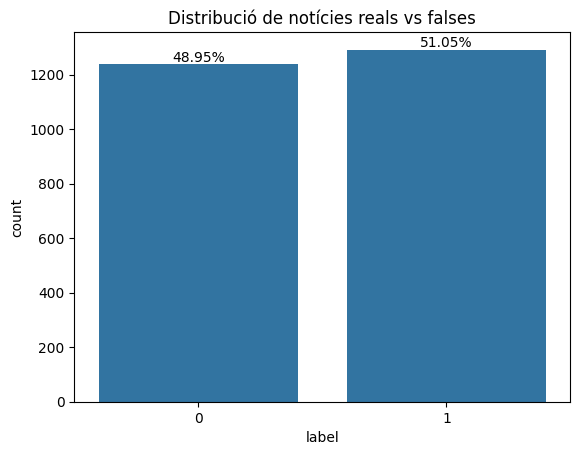

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
label_percentages = df['label'].value_counts(normalize=True) * 100

sns.countplot(x='label', data=df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = height / len(df) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 10, f'{percentage:.2f}%', ha='center')

plt.title("Distribució de notícies reals vs falses")
plt.show()

L'objectiu de balancejar el dataset s'ha assolit satisfactoriament

In [451]:
unique_languages = df['language'].unique()

print("Opcions de llengües disponibles:")
for lang in unique_languages:
    print(lang)

Opcions de llengües disponibles:
english
ignore
german
french
spanish


In [452]:
#mirem quin idioma és 'ignore'
ignored_titles = df[df['language'] == 'ignore']['title']
print("Títols de les notícies amb idioma 'ignore':")
for title in ignored_titles:
    print(title)
#
ignored_titles = df[(df['text'].isna())]['title']
print("Títols de les notícies amb idioma 'ignore':")
for title in ignored_titles:
    print(title)

Títols de les notícies amb idioma 'ignore':
billion dollars for the jewish lobby just the tip of the iceberg
national bugle radio the first step towards overthrowing jewish power
Títols de les notícies amb idioma 'ignore':


In [453]:
#veiem que és 'english' així que ho susbtituim
df['language'] = df['language'].replace('ignore', 'english').fillna('english')




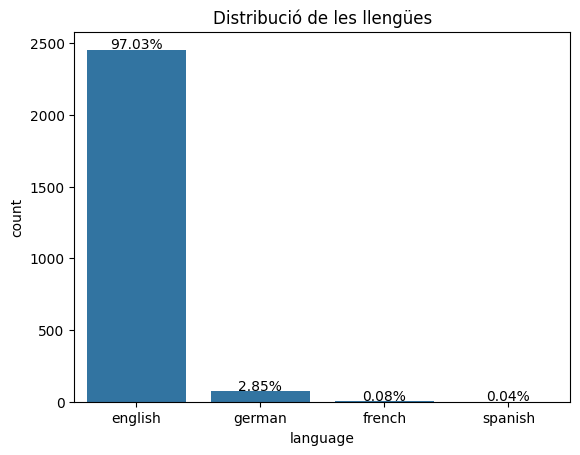

In [454]:
# Distribució dels idiomes
language_counts = df['language'].value_counts()
language_percentages = df['language'].value_counts(normalize=True) * 100

sns.countplot(x='language', data=df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = height / len(df) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 10, f'{percentage:.2f}%', ha='center')

plt.title("Distribució de les llengües")
plt.show()